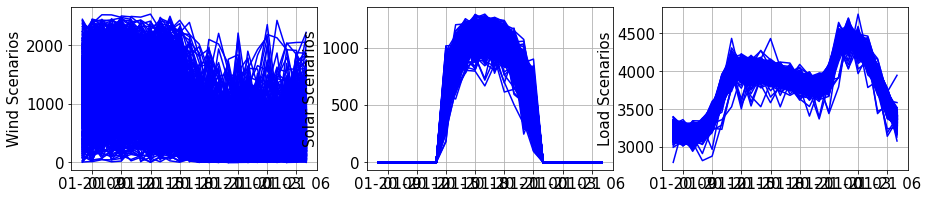

In [1]:
import bz2
import dill as pickle
import pandas as pd
import csv
import matplotlib.pyplot as plt
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
out_file = "scens_2020-01-20.p.gz"
with bz2.BZ2File(out_file, "rb") as f:
    scenarios = pickle.load(f)
    #print(day_scens[])
df = pd.DataFrame([scenarios])
#print(dict.keys(scenarios))
WindScenarios=scenarios['Wind']['309_WIND_1']+scenarios['Wind']['303_WIND_1']+scenarios['Wind']['122_WIND_1']+scenarios['Wind']['317_WIND_1']
#print(WindScenarios)
WindScenarios.to_csv('WindScenariosAggregated.csv')
SolarAsset=['320_PV_1', '314_PV_1', '314_PV_2', '313_PV_1', '314_PV_3', '314_PV_4', '313_PV_2', '310_PV_1', '324_PV_1', '312_PV_1', '310_PV_2', '324_PV_2', '324_PV_3', '113_PV_1', '319_PV_1', '215_PV_1', '102_PV_1', '101_PV_1', '102_PV_2', '104_PV_1', '101_PV_2', '101_PV_3', '101_PV_4', '103_PV_1', '119_PV_1']
#print(len(SolarAsset))
SolarScenarios=scenarios['Solar'][SolarAsset[0]]
for i in range(1,25):
    SolarScenariosNew=scenarios['Solar'][SolarAsset[i]]
    SolarScenarios=SolarScenarios+SolarScenariosNew
    SolarScenariosNew.to_csv('SolarScenario'+str(i)+'.csv')
#print(SolarScenarios)
SolarScenarios.to_csv('SolarScenariosAggregated.csv')
LoadScenarios=scenarios['Load']['1']+scenarios['Load']['2']+scenarios['Load']['3']

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Wind Scenarios",fontsize=15)
plt.plot(WindScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Solar Scenarios",fontsize=15)
plt.plot(SolarScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Load Scenarios",fontsize=15)
plt.plot(LoadScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

Process RTS sample scenarios to understand input-output relationship between RTS scenarios and Vatic outputs:
(i) total daily system costs; (ii) lost load; (iii) renewable curtailment.

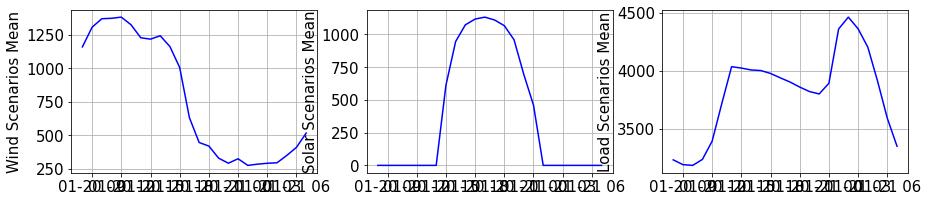

In [2]:
from numpy import mean
WindMean = mean(WindScenarios)
SolarMean = mean(SolarScenarios)
LoadMean = mean(LoadScenarios)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Wind Scenarios Mean",fontsize=15)
plt.plot(WindMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Solar Scenarios Mean",fontsize=15)
plt.plot(SolarMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Load Scenarios Mean",fontsize=15)
plt.plot(LoadMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

[12, 230, 319, 342, 539, 587, 905]


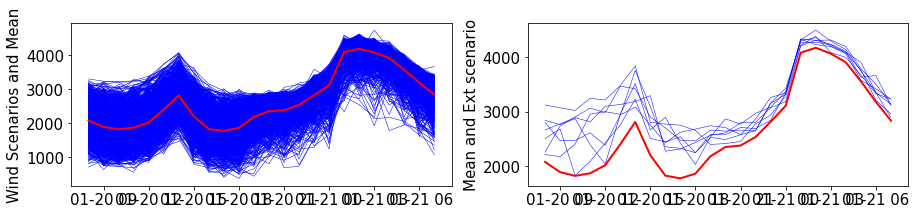

In [3]:
DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
MeanDiff=mean(DifferenceLoadWindSolar)
import matplotlib.pyplot as plt
import numpy as np
import math
Thresold=MeanDiff
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.tick_params(labelsize=15)
ax.set_ylabel("Wind Scenarios and Mean",fontsize=15)
plt.plot(DifferenceLoadWindSolar.T,'b', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

index=[]
time=WindScenarios.keys()
ax = fig.add_subplot(1,2,2)
ax.tick_params(labelsize=15)
ax.set_ylabel("Mean and Ext scenario",fontsize=15)
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(0,24):
        CheckArray.append(check[time[t]])
    if(all(x > 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(index)
plt.show()

We consider all load, solar and wind to be stochastic and in that case we try to understand the relationship between the scenarios and the vatic output

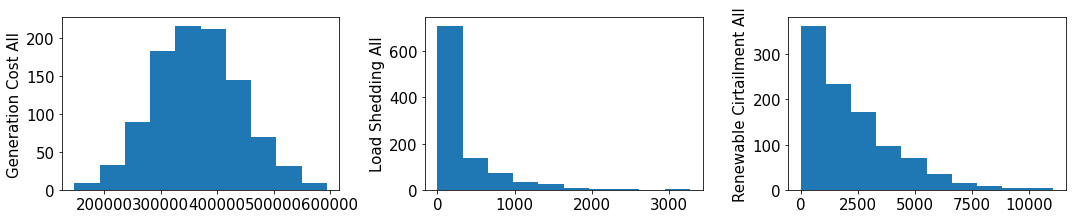

In [4]:
import bz2
import dill as pickle
import pandas as pd
import csv
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
out_file = "daily_summary.p.gz"
with bz2.BZ2File(out_file, "rb") as f:
    day_scens = pickle.load(f)
    #print(day_scens[])
df = pd.DataFrame([day_scens])
#print(dict.keys(day_scens))
LoadSheddingAll=day_scens[()]['Load shedding']
#print(LoadShedding)
GenerationCostAll=day_scens[()]['Generation costs']
#print(GenerationCost)
RenewableCurtailmentAll=day_scens[()]['Renewables curtailment']
#print(RenewablesCurtailment)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Generation Cost All",fontsize=15)
ax.hist(GenerationCostAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Load Shedding All",fontsize=15)
ax.hist(LoadSheddingAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.hist(RenewableCurtailmentAll)
ax.set_ylabel("Renewable Cirtailment All",fontsize=15)
ax.tick_params(labelsize=15)
plt.tight_layout()
plt.savefig("C:\\Users\\Mahashweta Patra\\Documents\\MikeLudkovski\\ORFEUSRTS\\type-pwrset-jan20-20211229T210546Z-001\\type-pwrset-jan20\\Figures\\VaticOutputAll.png", dpi=300)


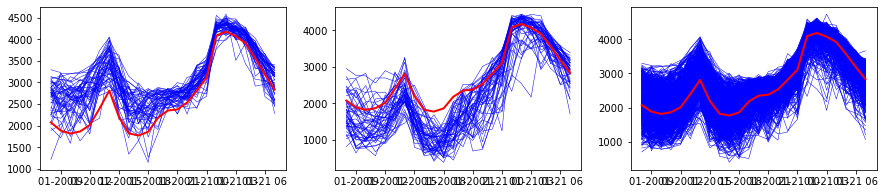

In [5]:
GenCostSortedAll=[]
LoadShedSortedAll=[]
CurtailSortedAll=[]
for i in range(0,1000):
    a=GenerationCostAll[i]
    b=RenewableCurtailmentAll[i]
    GenCostSortedAll.append(a)
    CurtailSortedAll.append(b)
#GenCostSorted.sort(reverse=True)
#print(GenCostSorted)

import numpy
sort_indexGenCostAll = numpy.argsort(GenCostSortedAll)
#print("Scenario indices that causes highest 5% generation cost:", sort_indexGenCostAll[950:1000])
sort_index_curAll = numpy.argsort(CurtailSortedAll)
#print("Scenario indices that causes highest 5% renewable curtailment:", sort_index_curAll[950:1000])
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

The scenario causing the high generation cost, for them the integration of energy generation over 24 hrs are high and above the thresold value.

63673.651625499995
[72247.7303, 71508.568, 72230.0557, 71967.6842, 73716.3557, 72052.2928, 73973.3621, 72383.3847, 72940.01569999999, 74135.93549999999, 72798.85849999999, 70288.02530000001, 72631.4008, 72214.4764, 73337.45509999999, 73695.02160000001, 72990.2928, 74895.19829999999, 76063.2167, 71825.09159999999, 72883.2916, 72662.0883, 74377.7215, 73170.4194, 73590.5074, 74415.8583, 73056.4397, 73436.2443, 74482.59079999999, 72900.3039, 73701.1126, 73564.3479, 73215.2605, 73514.46, 74442.9662, 73363.469, 75582.5864, 75205.7075, 74698.08410000001, 72251.0732, 75261.9252, 74583.12839999999, 77178.36360000001, 76743.8135, 75197.3548, 75399.3275, 75959.6155, 76531.6286, 77929.8755, 79172.9744]


50

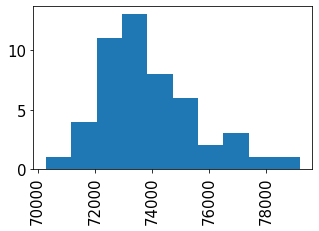

In [6]:
ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)
import numpy as np  
SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
print(IntegrationScen)
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
ax.hist(IntegrationScen, bins=10)
plt.xticks(rotation=90)
sum(i > SumThresold for i in IntegrationScen)

 We consider only those scenario which has a rapid jump in energy generation from 16th hour to 17th hour. This rapid jump in energy causes the higher generation cost. The scenarios that causes the highest 5% generation cost does not have any connection with the Load shedding or the renewable curtailment though.

Number of extreme scenarios causing higher generation cost: 52


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

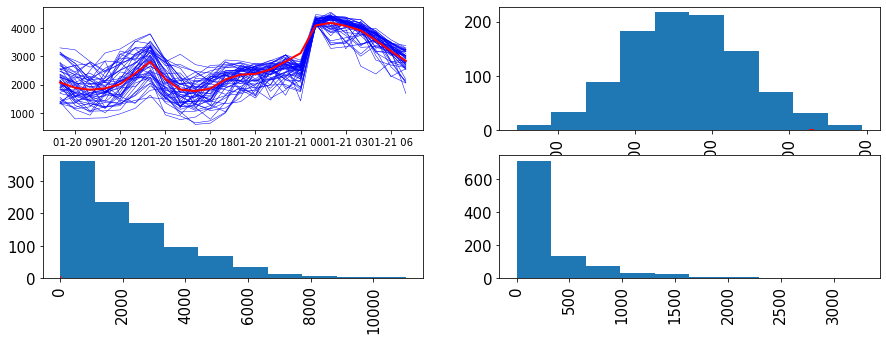

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(2,2,1)
jumpidx=[]
for k in sort_indexGenCostAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    jump=DifferenceLoadWindSolar[time[17]][k]-DifferenceLoadWindSolar[time[16]][k]
    jump2=DifferenceLoadWindSolar[time[17]][k]
    if (jump>1500 and jump2>4000):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        jumpidx.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

print("Number of extreme scenarios causing higher generation cost:",len(jumpidx))
#print("The scenarios causing higher generation cost:", jumpidx)
HighGenCost=[]
for i in index:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(2,2,2)
ax.tick_params(labelsize=15)
ax.hist(GenerationCostAll)
ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)

HighCur=[]
for i in index:
    HighCur.append(RenewableCurtailmentAll[i])
#print("Renewable curtailment values for the scenarios that causes high generation cost",HighCur)
ax = fig.add_subplot(2,2,3)
ax.tick_params(labelsize=15)
ax.hist(RenewableCurtailmentAll)
ax.hist(HighCur, bins=10,color = "red")
plt.xticks(rotation=90)

ExtLoad=[]
for i in index:
    ExtLoad.append(LoadSheddingAll[i])
#print("Load shedding values for the scenarios that causes high generation cost",ExtLoad)
ax = fig.add_subplot(2,2,4)
ax.tick_params(labelsize=15)
ax.hist(LoadSheddingAll)
ax.hist(ExtLoad, bins=10,color = "red")
plt.xticks(rotation=90)
#print(time)

We consider those scenarios whose integration value is high (higher than some thresold value)

[72505.3333, 72261.1053, 72218.5619, 72189.5597, 72446.4718, 73906.11679999999, 72163.43340000001, 72276.01280000001, 72722.38919999999, 72038.936, 72237.07860000001, 72247.7303, 72230.0557, 73716.3557, 72052.2928, 73973.3621, 72383.3847, 72940.01569999999, 74135.93549999999, 72798.85849999999, 72631.4008, 72214.4764, 73337.45509999999, 73695.02160000001, 72990.2928, 74895.19829999999, 76063.2167, 72883.2916, 72662.0883, 74377.7215, 73170.4194, 73590.5074, 74415.8583, 73056.4397, 73436.2443, 74482.59079999999, 72900.3039, 73701.1126, 73564.3479, 73215.2605, 73514.46, 74442.9662, 73363.469, 75582.5864, 75205.7075, 74698.08410000001, 72251.0732, 75261.9252, 74583.12839999999, 77178.36360000001, 76743.8135, 75197.3548, 75399.3275, 75959.6155, 76531.6286, 77929.8755, 79172.9744]
57


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

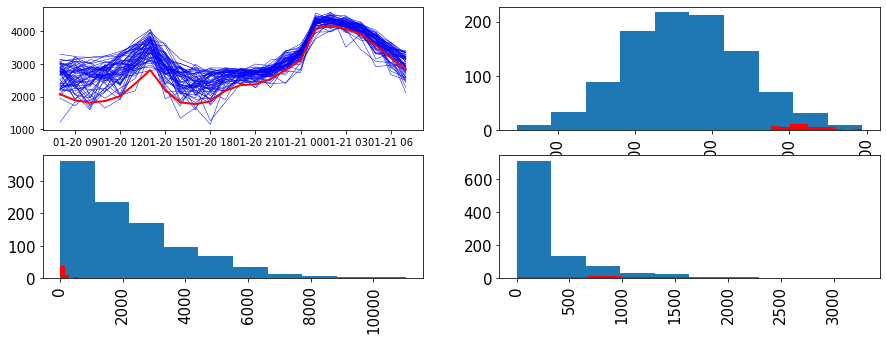

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,5))
ax.tick_params(labelsize=15)
ax = fig.add_subplot(2,2,1)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    if (a>72000):
        IntegrationScen.append(a)
        ExtScenIdx.append(k)
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(2,2,2)
ax.tick_params(labelsize=15)
ax.hist(GenerationCostAll)
ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)

HighCur=[]
for i in ExtScenIdx:
    HighCur.append(RenewableCurtailmentAll[i])
#print("Renewable curtailment values for the scenarios that causes high generation cost",HighCur)
ax = fig.add_subplot(2,2,3)
ax.tick_params(labelsize=15)
ax.hist(RenewableCurtailmentAll)
ax.hist(HighCur, bins=10,color = "red")
plt.xticks(rotation=90)

ExtLoad=[]
for i in ExtScenIdx:
    ExtLoad.append(LoadSheddingAll[i])
#print("Load shedding values for the scenarios that causes high generation cost",ExtLoad)
ax = fig.add_subplot(2,2,4)
ax.tick_params(labelsize=15)
ax.hist(LoadSheddingAll)
ax.hist(ExtLoad, bins=10,color = "red")
plt.xticks(rotation=90)
#print(time)

Text(0, 0.5, 'Generation cost')

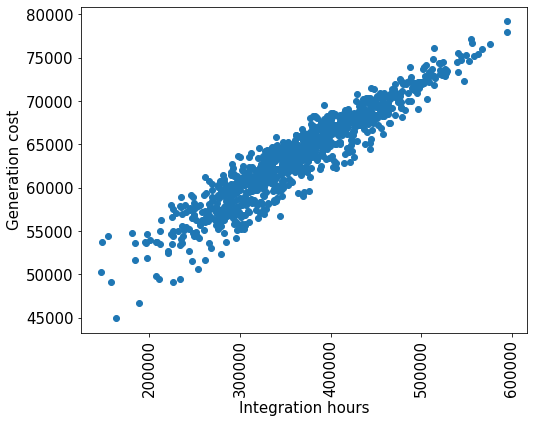

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(8,6))
ax.tick_params(labelsize=15)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    IntegrationScen.append(a)
    ExtScenIdx.append(k)
    #plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
#plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
#print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
#print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
plt.scatter(HighGenCost,IntegrationScen)
#ax.hist(GenerationCostAll)
#ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)
ax.set_xlabel("Integration hours",fontsize=15)
ax.set_ylabel("Generation cost",fontsize=15)